In [1]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.optimizers import Adam
from keras import layers

In [2]:
# reads imported excel

df = pd.read_excel(r"C:\workspace\Maroon Capital\MSFT.xlsx")

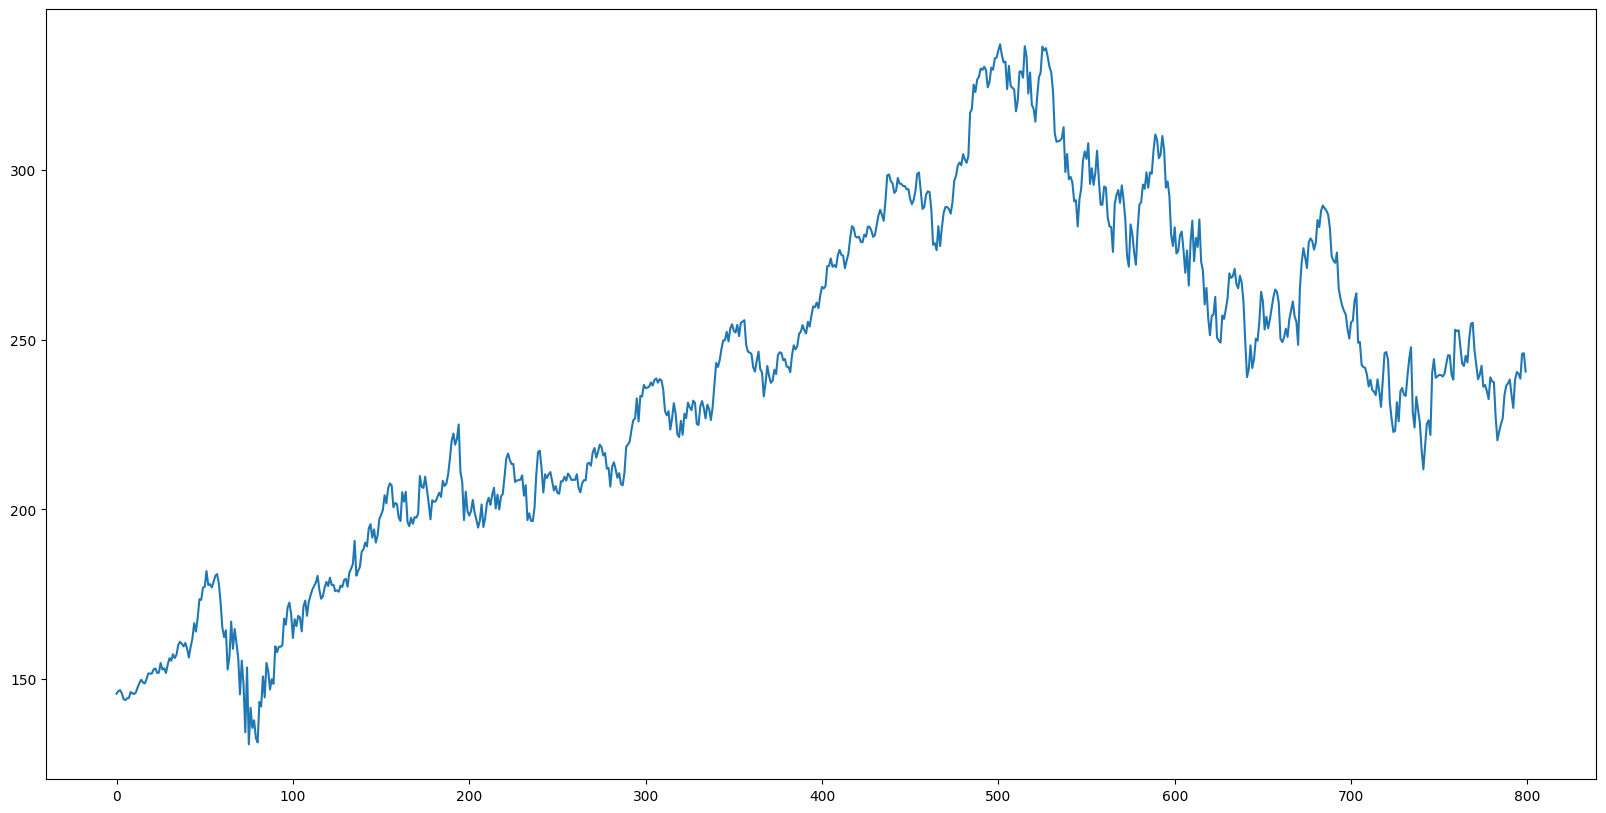

In [74]:
# original data trends

adjclose = []

for i in range(200, 1000):
    adjclose.append(df.iloc[i][6])
adjclose = np.array(adjclose)

plt.figure(figsize = (20, 10))
plt.plot(adjclose)
plt.show()

In [94]:
# gets twitter sentiment score

def ts_score(time):
    return df.iloc[time][8]

In [95]:
# calculates current trend

list_5 = []
list_20 = []

def cur_trend(time):
    for i in range(time - 5, time):
        list_5.append(df.iloc[i][6])
    sma_5 = sum(tuple(list_5)) / 5

    for i in range(time - 20, time):
        list_20.append(df.iloc[i][6])
    sma_20 = sum(tuple(list_20)) / 20  

    cur_trend = sma_5 - sma_20
    
    return cur_trend

In [137]:
# gets weighted past data and sentiments for training

def get_info(time):
    p_data = []

    for i in range(1, 21):
        p_data.append((df.iloc[time + 1 - i][6]))
        p_data.append((df.iloc[time + 1 - i][8]))
    p_data.append(df.iloc[time + 1][6])
    
    return p_data

In [147]:
# creates dataset

column = []
for num in range(1, 41):
    column.append(str(num))
column.append("Test")

data = pd.DataFrame(columns = column)
for i in range(20, 1000):
   data.loc[len(data)] = get_info(i)

In [146]:
# dataset

X_train = data.to_numpy()[:, :-1]
y_train = data.to_numpy()[:, -1]

X = X_train.reshape((len(data), X_train.shape[1], 1)).astype(np.float32)[:int(len(data)* 0.7)]
Y = y_train.astype(np.float32)[:int(len(data) * 0.7)]

X_val = X_train.reshape((len(data), X_train.shape[1], 1)).astype(np.float32)[int(len(data) * 0.7):]
Y_val = y_train.astype(np.float32)[int(len(data) * 0.7):]

In [145]:
# 4-layered neural network

model = Sequential([layers.Input((40, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X, Y, validation_data=(X_val, Y_val), epochs=100)

Epoch 1/100
22/22 [==============================] - 4s 57ms/step - loss: 41511.4414 - mean_absolute_error: 195.0489 - val_loss: 71497.7578 - val_mean_absolute_error: 265.7190
Epoch 2/100
22/22 [==============================] - 1s 28ms/step - loss: 40257.9453 - mean_absolute_error: 191.7722 - val_loss: 68532.1328 - val_mean_absolute_error: 260.0096
Epoch 3/100
22/22 [==============================] - 1s 23ms/step - loss: 36703.4297 - mean_absolute_error: 182.2256 - val_loss: 60411.9453 - val_mean_absolute_error: 243.8503
Epoch 4/100
22/22 [==============================] - 1s 25ms/step - loss: 28620.5547 - mean_absolute_error: 158.2638 - val_loss: 45616.5586 - val_mean_absolute_error: 211.4430
Epoch 5/100
22/22 [==============================] - 1s 25ms/step - loss: 18046.7891 - mean_absolute_error: 119.8321 - val_loss: 28517.0430 - val_mean_absolute_error: 166.1947
Epoch 6/100
22/22 [==============================] - 1s 26ms/step - loss: 8548.1064 - mean_absolute_error: 73.5820 - val

In [143]:
# gets weighted past data and sentiments for testing

def get_test_info(time):
    p_data = []

    for i in range(1, 21):
        p_data.append(df.iloc[time + 1 - i][6])
        p_data.append(df.iloc[time + 1 - i][8])
    
    return p_data

1/1 [==============================] - 0s 61ms/step


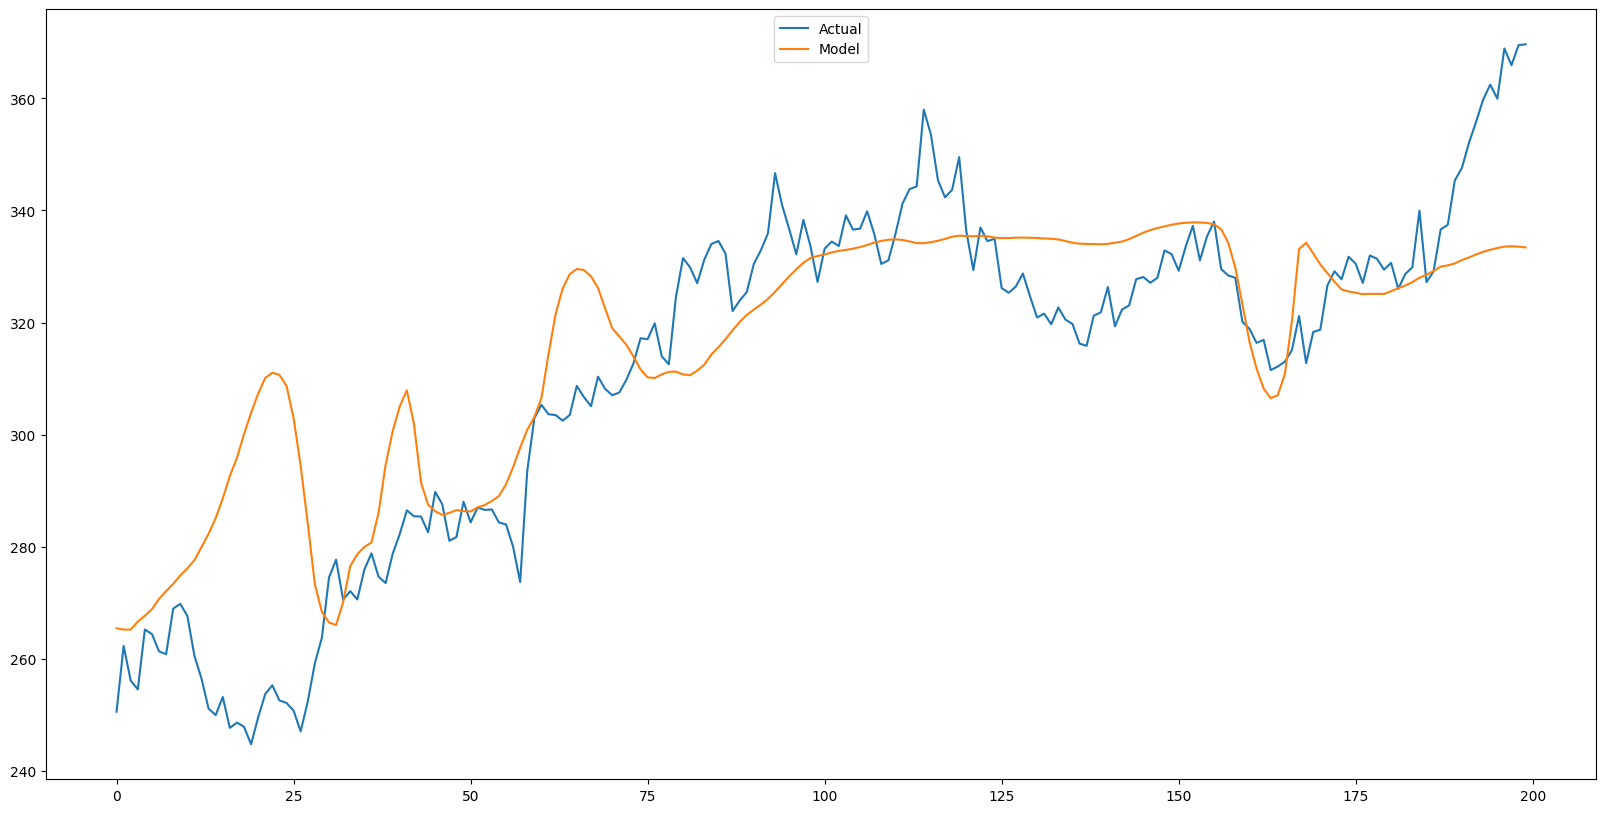

In [144]:
# visualization of test results

act_adjclose = []
test_adjclose = []
test_val = df.iloc[1000][6]

for i in range(1000, 1200):
    act_adjclose.append((df.iloc[i + 1][6]))
    test_adjclose.append(model.predict([get_test_info(i)]).flatten())
act_adjclose = np.array(act_adjclose)
test_adjclose = np.array(test_adjclose)

plt.figure(figsize = (20, 10))
plt.plot(act_adjclose, label = "Actual")
plt.plot(test_adjclose, label = "Model")
leg = plt.legend(loc = 'upper center')
plt.show()